#### Import libraries

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [186]:
epf_col_names = ["SE3","SE3(-1)","SE3(-2)","SE3(-3)","SE3(-7)","Air Temperature SE1(-1)","Air Temperature SE2(-1)","Air Temperature SE3(-1)","Air Temperature SE4(-1)","Air Temperature SE1(-7)","Air Temperature SE2(-7)","Air Temperature SE3(-7)","Air Temperature SE4(-7)","Air Temperature SE1(+1)","Air Temperature SE2(+1)","Air Temperature SE3(+1)","Air Temperature SE4(+1)","Windspeed SE1(-1)","Windspeed SE2(-1)","Windspeed SE3(-1)","Windspeed SE4(-1)","Windspeed SE1(-7)","Windspeed SE2(-7)","Windspeed SE3(-7)","Windspeed SE4(-7)","Windspeed SE1(+1)","Windspeed SE2(+1)","Windspeed SE3(+1)","Windspeed SE4(+1)","Precipitation SE1(-1)","Precipitation SE2(-1)","Precipitation SE3(-1)","Precipitation SE4(-1)","Precipitation SE1(-7)","Precipitation SE2(-7)","Precipitation SE3(-7)","Precipitation SE4(-7)","Precipitation SE1(+1)","Precipitation SE2(+1)","Precipitation SE3(+1)","Precipitation SE4(+1)","Diesel(-1)","Diesel(-7)","Diesel(+1)","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Date"]
epf = pd.read_csv("EPF_DailyInputFeatures_FULL.csv", skiprows = 1, header = None, names = epf_col_names)

# Show first 10 rows
epf.head(10)

,SE3,SE3(-1),SE3(-2),SE3(-3),SE3(-7),Air Temperature SE1(-1),Air Temperature SE2(-1),Air Temperature SE3(-1),Air Temperature SE4(-1),Air Temperature SE1(-7),...,Diesel(-7),Diesel(+1),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Date
0,31.057917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,13.84,0,0,0,0,1,0,0,2017-03-03T00:00
1,30.170833,31.057917,0.000000,0.000000,0.000000,-10.339440,-6.971974,0.829487,3.473781,0.000000,...,0.00,13.84,0,0,0,0,0,1,0,2017-03-04T00:00
2,28.410000,30.170833,31.057917,0.000000,0.000000,-10.211119,-9.471219,-0.004936,3.065089,0.000000,...,0.00,13.84,0,0,0,0,0,0,1,2017-03-05T00:00
3,33.115833,28.410000,30.170833,31.057917,0.000000,-13.217934,-11.898820,-2.147033,2.202127,0.000000,...,0.00,13.84,1,0,0,0,0,0,0,2017-03-06T00:00
4,41.635000,33.115833,28.410000,30.170833,0.000000,-15.265903,-12.570935,-2.810373,-0.000839,0.000000,...,0.00,13.84,0,1,0,0,0,0,0,2017-03-07T00:00
5,33.805833,41.635000,33.115833,28.410000,0.000000,-15.170166,-10.755109,-3.582340,-1.402422,0.000000,...,0.00,13.84,0,0,1,0,0,0,0,2017-03-08T00:00
6,32.217083,33.805833,41.635000,33.115833,0.000000,-9.696177,-7.426107,-2.525716,0.094990,0.000000,...,0.00,13.84,0,0,0,1,0,0,0,2017-03-09T00:00
7,31.582917,32.217083,33.805833,41.635000,31.057917,-8.245445,-5.340871,1.552673,3.415915,-10.339440,...,13.84,13.84,0,0,0,0,1,0,0,2017-03-10T00:00
8,31.065833,31.582917,32.217083,33.805833,30.170833,-7.000180,-3.935623,1.270432,3.473797,-10.211119,...,13.84,13.84,0,0,0,0,0,1,0,2017-03-11T00:00
9,29.120417,31.065833,31.582917,32.217083,28.410000,-3.535091,-2.645971,0.081401,2.075371,-13.217934,...,13.84,13.84,0,0,0,0,0,0,1,2017-03-12T00:00


#### Convert data to correct format

In [187]:
epf['Date'] = pd.to_datetime(epf['Date'])

# Set date as dataset index
epf = epf.set_index('Date')

# Set new column names
epf_col_names = ["SE3","SE3(-1)","SE3(-2)","SE3(-3)","SE3(-7)","Air Temperature SE1(-1)","Air Temperature SE2(-1)","Air Temperature SE3(-1)","Air Temperature SE4(-1)","Air Temperature SE1(-7)","Air Temperature SE2(-7)","Air Temperature SE3(-7)","Air Temperature SE4(-7)","Air Temperature SE1(+1)","Air Temperature SE2(+1)","Air Temperature SE3(+1)","Air Temperature SE4(+1)","Windspeed SE1(-1)","Windspeed SE2(-1)","Windspeed SE3(-1)","Windspeed SE4(-1)","Windspeed SE1(-7)","Windspeed SE2(-7)","Windspeed SE3(-7)","Windspeed SE4(-7)","Windspeed SE1(+1)","Windspeed SE2(+1)","Windspeed SE3(+1)","Windspeed SE4(+1)","Precipitation SE1(-1)","Precipitation SE2(-1)","Precipitation SE3(-1)","Precipitation SE4(-1)","Precipitation SE1(-7)","Precipitation SE2(-7)","Precipitation SE3(-7)","Precipitation SE4(-7)","Precipitation SE1(+1)","Precipitation SE2(+1)","Precipitation SE3(+1)","Precipitation SE4(+1)","Diesel(-1)","Diesel(-7)","Diesel(+1)","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

#### Prepare data

In [188]:
# Separate columns between attributes and prices
X, Y = epf.iloc[:,1:].values, epf.iloc[:,:1].values

#### Divide the data between training and testing

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, shuffle = False)

#### Perform training

In [190]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

#### Perform testing

In [191]:
Y_predict = linear_regressor.predict(X_test)
Y_predict = pd.DataFrame(Y_predict, columns = ['Predicted'])

#### Evaluation

In [192]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_predict))
print("Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(Y_test, Y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

Mean Absolute Error: 30.095343348487383
Mean Absolute Percentage Error: 0.6045902978126488
Root Mean Squared Error: 43.429309553485815


#### Plot chart

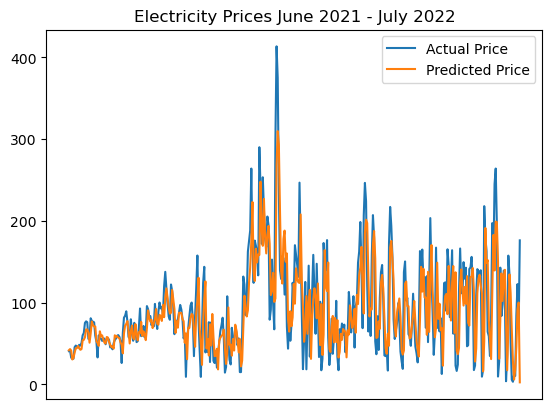

In [193]:
fig = plt.figure()

plt.plot(Y_test)
plt.plot(Y_predict)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices June 2021 - July 2022')

plt.legend(['Actual Price', 'Predicted Price'])

#### Rolling windows

In [163]:
epf_7d_rol = epf[epf_col_names].rolling(window = 7, center = True).mean()
epf_365d_rol = epf[epf_col_names].rolling(window = 365, center = True).mean()

Text(0.5, 1.0, 'Trends in Electricity Price')

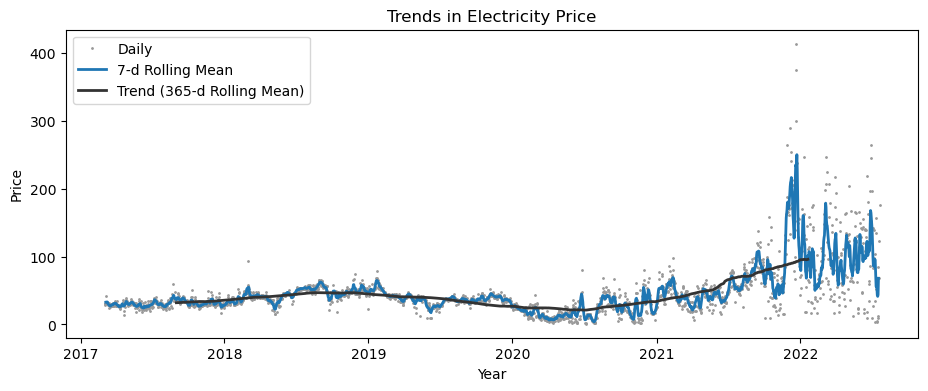

In [164]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(epf['SE3'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(epf_7d_rol['SE3'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(epf_365d_rol['SE3'], color='0.2', linewidth=2, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Trends in Electricity Price')

#### De-trending time series

In [165]:
# differencing: value at time (t) = original value at time (t) - original value at time (t-1)

# creating the first order differencing data
epf_first_order_diff = epf[epf_col_names].diff()

In [166]:
epf_first_order_diff_7d_rol = epf_first_order_diff[epf_col_names].rolling(window = 7, center = True).mean()
epf_first_order_diff_365d_rol = epf_first_order_diff[epf_col_names].rolling(window = 365, center = True).mean()

Text(0.5, 1.0, 'Trends in Electricity Price')

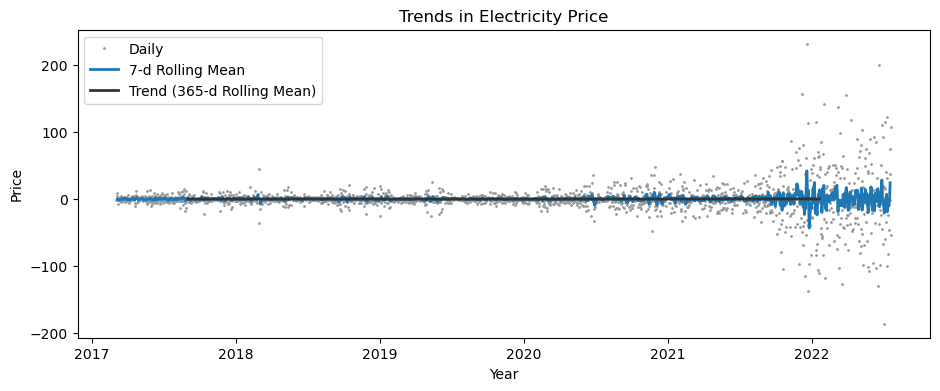

In [167]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(epf_first_order_diff['SE3'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(epf_first_order_diff_7d_rol['SE3'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(epf_first_order_diff_365d_rol['SE3'], color='0.2', linewidth=2, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Trends in Electricity Price')

#### Seasonality

<AxesSubplot:xlabel='Date'>

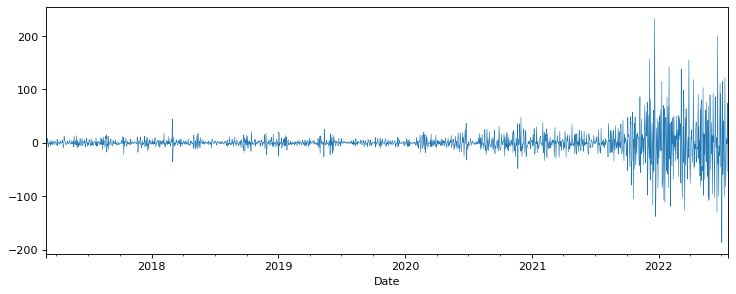

In [168]:
plt.figure(figsize=(11,4), dpi= 80)
epf_first_order_diff['SE3'].plot(linewidth = 0.5)

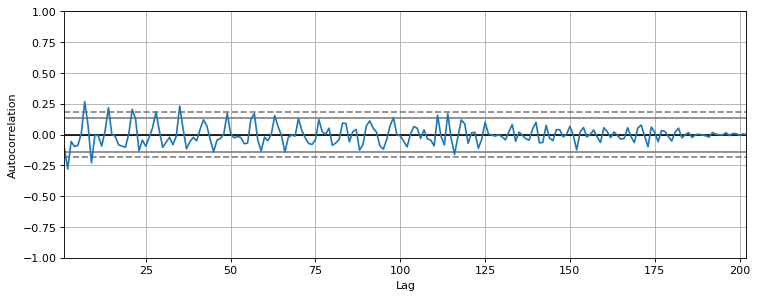

In [169]:
# Plotting autocorrelation
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(epf_first_order_diff.loc['2022-01': '2022-07', 'SE3']);

In [170]:
# Remove null first row
epf_first_order_diff = epf_first_order_diff.tail(-1)

In [220]:
epf_first_order_diff.head(10)

,SE3,SE3(-1),SE3(-2),SE3(-3),SE3(-7),Air Temperature SE1(-1),Air Temperature SE2(-1),Air Temperature SE3(-1),Air Temperature SE4(-1),Air Temperature SE1(-7),...,Diesel(-1),Diesel(-7),Diesel(+1),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-04,-0.887083,31.057917,0.000000,0.000000,0.000000,-10.339440,-6.971974,0.829487,3.473781,0.000000,...,13.84,0.00,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2017-03-05,-1.760833,-0.887083,31.057917,0.000000,0.000000,0.128321,-2.499246,-0.834423,-0.408692,0.000000,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
2017-03-06,4.705833,-1.760833,-0.887083,31.057917,0.000000,-3.006815,-2.427600,-2.142097,-0.862963,0.000000,...,0.00,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
2017-03-07,8.519167,4.705833,-1.760833,-0.887083,0.000000,-2.047970,-0.672115,-0.663339,-2.202966,0.000000,...,0.00,0.00,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-03-08,-7.829167,8.519167,4.705833,-1.760833,0.000000,0.095737,1.815826,-0.771968,-1.401583,0.000000,...,0.00,0.00,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
2017-03-09,-1.588750,-7.829167,8.519167,4.705833,0.000000,5.473988,3.329002,1.056624,1.497412,0.000000,...,0.00,0.00,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
2017-03-10,-0.634167,-1.588750,-7.829167,8.519167,31.057917,1.450733,2.085235,4.078389,3.320925,-10.339440,...,0.00,13.84,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
2017-03-11,-0.517083,-0.634167,-1.588750,-7.829167,-0.887083,1.245264,1.405249,-0.282241,0.057882,0.128321,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2017-03-12,-1.945417,-0.517083,-0.634167,-1.588750,-1.760833,3.465090,1.289652,-1.189031,-1.398426,-3.006815,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


#### Nested Cross-Validation

In [221]:
def nested_cross_validation(df, n_splits = 3):
    
    trainTestSplit = TimeSeriesSplit(n_splits+1).split(df)
    next(trainTestSplit) #Skip the first fold
    
    for trainCvIndices, testIndices in trainTestSplit:
        # First, we split Train + CV and Test
        XTrainCv, yTrainCv = df.iloc[trainCvIndices, 1:], df.iloc[trainCvIndices, :1]
        XTest, yTest       = df.iloc[testIndices, 1:]   , df.iloc[testIndices, :1]
    
        # Then, we build a list of the form [ ( [...Train Indices...], [...CV Indices...]  )]
        testLength = len(XTest)
        trainCvSplit = [(list(range(trainCvIndices[0],trainCvIndices[-testLength])),
                     list(range(trainCvIndices[-testLength],trainCvIndices[-1]+1)))]
    
        # Printing date ranges
        print("Training:"           , XTrainCv.index[0].date(), "--", XTrainCv.index[-testLength-1].date(),
              ", Cv:"     , XTrainCv.index[-testLength].date(), "--", XTrainCv.index[-1].date(),
              ", Test:"                , XTest.index[0].date(), "--", XTest.index[-1].date())
        
    modelCV = RidgeCV(cv = trainCvSplit).fit(XTrainCv,yTrainCv)
    YPredict = modelCV.predict(XTest)
    YPredict = pd.DataFrame(YPredict, columns = ['Predicted'])
    
    return yTest, YPredict

##### Un-season Dataset

In [232]:
yTest_epf, YPredict_epf = nested_cross_validation(epf, n_splits = 2)
print("    Mean Absolute Error:", metrics.mean_absolute_error(yTest_epf, YPredict_epf))
print("    Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(yTest_epf, YPredict_epf))
print("    Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(yTest_epf, YPredict_epf)))

Training: 2017-03-03 -- 2018-07-09 , Cv: 2018-07-10 -- 2019-11-12 , Test: 2019-11-13 -- 2021-03-17
Training: 2017-03-03 -- 2019-11-12 , Cv: 2019-11-13 -- 2021-03-17 , Test: 2021-03-18 -- 2022-07-21
    Mean Absolute Error: 25.56842363707968
    Mean Absolute Percentage Error: 0.5332727897928494
    Root Mean Squared Error: 39.26272533686493


##### Un-season + Un-trend Dataset

In [233]:
yTest_diff, YPredict_diff = nested_cross_validation(epf_first_order_diff, n_splits = 2)
print("    Mean Absolute Error:", metrics.mean_absolute_error(yTest_diff, YPredict_diff))
print("    Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(yTest_diff, YPredict_diff))
print("    Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(yTest_diff, YPredict_diff)))

Training: 2017-03-04 -- 2018-07-09 , Cv: 2018-07-10 -- 2019-11-12 , Test: 2019-11-13 -- 2021-03-17
Training: 2017-03-04 -- 2019-11-12 , Cv: 2019-11-13 -- 2021-03-17 , Test: 2021-03-18 -- 2022-07-21
    Mean Absolute Error: 27.226934247152375
    Mean Absolute Percentage Error: 1.4326422481010033
    Root Mean Squared Error: 41.33104713150935


#### Plot chart

##### Un-season Dataset

In [234]:
yTest = yTest.reset_index()['SE3']

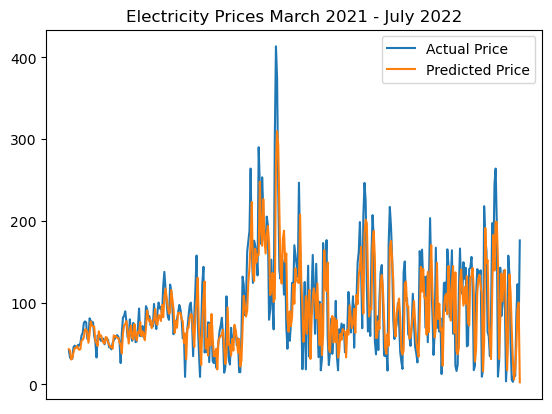

In [238]:
fig = plt.figure()

plt.plot(yTest)
plt.plot(YPredict)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices March 2021 - July 2022')
plt.legend(['Actual Price', 'Predicted Price'])

##### Un-season + Un-trend Dataset

In [236]:
yTest_diff = yTest_diff.reset_index()['SE3']

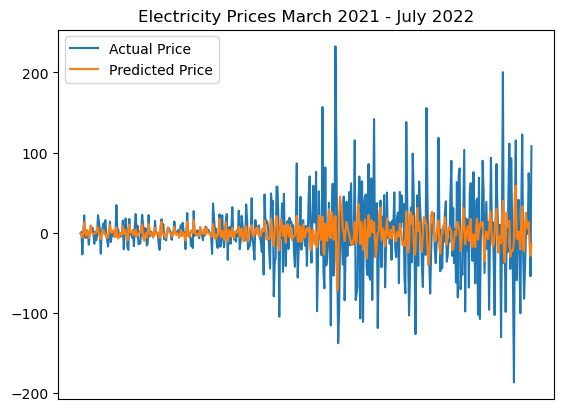

In [239]:
fig = plt.figure()

plt.plot(yTest_diff)
plt.plot(YPredict_diff)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices March 2021 - July 2022')
plt.legend(['Actual Price', 'Predicted Price'])